# Exploratory Data Analysis on all fluid inclusion data (not geolocated)

- Clean data - DONE
- Use [pandas profiling](https://github.com/pandas-profiling/pandas-profiling)
  - This did not work due to:
      `MemoryError: Unable to allocate 319. TiB for an array with shape (43812872618454,) and data type float64`
- Use [missingno](https://github.com/ResidentMario/missingno) as first pass
- Use [seaborn](https://seaborn.pydata.org/examples/index.html) for quick plots

Data files:

In [1]:
clean = './data/cleaned_types.csv'

Imports

In [2]:
import numpy as np
import pandas as pd

import missingno as msno
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact

## First pass

In [3]:
df = pd.read_csv(clean)
pd.set_option('display.max_columns', None)
df.head()

,Type,Geothermal Province,State,Field,Well ID,Sample ID,Depth (ft),AMU1,AMU2,AMU3,AMU4,AMU5,AMU6,AMU7,AMU8,AMU9,AMU10,AMU11,AMU12,AMU13,AMU14,AMU15,AMU16,AMU17,AMU18,AMU19,AMU20,AMU21,AMU22,AMU23,AMU24,AMU25,AMU26,AMU27,AMU28,AMU29,AMU30,AMU31,AMU32,AMU33,AMU34,AMU35,AMU36,AMU37,AMU38,AMU39,AMU40,AMU41,AMU42,AMU43,AMU44,AMU45,AMU46,AMU47,AMU48,AMU49,AMU50,AMU51,AMU52,AMU53,AMU54,AMU55,AMU56,AMU57,AMU58,AMU59,AMU60,AMU61,AMU62,AMU63,AMU64,AMU65,AMU66,AMU67,AMU68,AMU69,AMU70,AMU71,AMU72,AMU73,AMU74,AMU75,AMU76,AMU77,AMU78,AMU79,AMU80,AMU81,AMU82,AMU83,AMU84,AMU85,AMU86,AMU87,AMU88,AMU89,AMU90,AMU91,AMU92,AMU93,AMU94,AMU95,AMU96,AMU97,AMU98,AMU99,AMU100.UNKN,AMU101.UNKN,AMU102.UNKN,AMU103.UNKN,AMU104.UNKN,AMU105.UNKN,AMU106.UNKN,AMU107.UNKN,AMU108.UNKN,AMU109.UNKN,AMU110.UNKN,AMU111.UNKN,AMU112.UNKN,AMU113.UNKN,AMU114.UNKN,AMU115.UNKN,AMU116.UNKN,AMU117.UNKN,AMU118.UNKN,AMU119.UNKN,AMU120.UNKN,AMU121.UNKN,AMU122.UNKN,AMU123.UNKN,AMU124.UNKN,AMU125.UNKN,AMU126.UNKN,AMU127.UNKN,AMU128.UNKN,AMU129.UNKN,AMU130.UNKN,AMU131.UNKN,AMU132.UNKN,AMU133.UNKN,AMU134.UNKN,AMU135.UNKN,AMU136.UNKN,AMU137.UNKN,AMU138.UNKN,AMU139.UNKN,AMU140.UNKN,AMU141.UNKN,AMU142.UNKN,AMU143.UNKN,AMU144.UNKN,AMU145.UNKN,AMU146.UNKN,AMU147.UNKN,AMU148.UNKN,AMU149.UNKN,AMU150.UNKN,AMU151.UNKN,AMU152.UNKN,AMU153.UNKN,AMU154.UNKN,AMU155.UNKN,AMU156.UNKN,AMU157.UNKN,AMU158.UNKN,AMU159.UNKN,AMU160.UNKN,AMU161.UNKN,AMU162.UNKN,AMU163.UNKN,AMU164.UNKN,AMU165.UNKN,AMU166.UNKN,AMU167.UNKN,AMU168.UNKN,AMU169.UNKN,AMU170.UNKN,AMU171.UNKN,AMU172.UNKN,AMU173.UNKN,AMU174.UNKN,AMU175.UNKN,AMU176.UNKN,AMU177.UNKN,AMU178.UNKN,AMU179.UNKN,AMU180.UNKN,FIT Well,Unnamed: 188,Unnamed: 8,Unnamed: 9,Unnamed: 187
0,Transform Extension,Sierra Nevada,California,COSO,15A-17,2202.0,510.0,0.0,294200.0,53.30,6.455000e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88430.0,5079.0,66790.0,30300.0,378600.0,98680.0,224600.0,0.0,0.0,282.9,11060.0,1.479000e+02,155.90,754.4,8497.0,206200.0,1530000.0,15190.0,2737.0,570.1,8456.00,1126.0,8829.0,288.7,0.00,195.5,1045.0,5693.0,6084.0,18260.0,7317.0,51020.0,1380000.0,56790.0,5054.0,0.0,0.0,0.000000e+00,421.10,192.80,6.827000e-11,3.927000e-11,2.681000e+02,1254.0,2515.0,3044.0,624.8,1.522000e-10,270.000,0.000,70.64,367.1,415.6,154.60,0.00,238.50,283.8,593.2,649.5,795.0,239.00,11.71,79.37,218.60,224.30,32.86,603.8,58.46,156.10,0.00,47.97,155.30,93.72,266.4,78.49,1.402,15.04,169.6,0.0,0.0,0.0,323.30,0.00,1.691,16.87,221.50,25.34,21.940,35.880,0.00,0.0,0.0,0.0,0.0,0.0,596.9,0.0,0.00,29.200,33.94,38.620,27.35,7.475,0.00,0.0000,6.527,1607.00,2109.0,31.710,0.00,31.41,37.170,28.190,0.000,5.205,14.820,0.00,0.0,1022.0,0.0,106.0,102.7,21.21,79.68,130.100,0.00,30.26,0.00,2.570,258.5,210.8,0.0,0.000,472.1,0.0,0.00,0.00,285.30,67.74,0.00,0.00,0.00,69.27,0.0,7009.0,29.7300,NaN,0.00,0.0,442.7,0.00,145.70,0.000,0.0,1055.0,0.0,0.000,10960000.0,0.0,41.940,0.0,0.000,0.00,0.00,0.0,0.00,2434.00,0.0,0.000,NaN,NaN,NaN,NaN,NaN
1,Transform Extension,Sierra Nevada,California,COSO,15A-17,2203.0,530.0,0.0,320600.0,48.95,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139200.0,3151.0,38760.0,62420.0,4367000.0,236000.0,511900.0,0.0,0.0,252.4,13800.0,9.894000e-12,95.07,535.4,5247.0,171900.0,945500.0,10890.0,2670.0,1079.0,13810.00,0.0,7551.0,0.0,0.00,203.8,351.7,1784.0,2762.0,14840.0,3233.0,92310.0,2615000.0,76580.0,6120.0,0.0,0.0,1.911000e+02,395.30,361.90,0.000000e+00,3.957000e+01,3.416000e-11,1699.0,1016.0,2696.0,163.0,1.524000e-10,153.700,27.460,16.07,1693.0,324.6,15.44,18.17,96.81,70.5,381.1,342.0,334.1,95.34,21.39,0.00,40.75,91.02,85.20,373.4,101.40,0.00,0.00,0.00,75.64,75.92,200.3,44.11,3.224,1125.00,0.0,0.0,451.4,583.2,0.00,33.30,0.000,79.69,17.98,19.65,83.230,8.254,0.00,307.1,0.0,0.0,0.0,0.0,51.1,0.0,0.00,77.890,18.34,0.000,43.72,11.200,32.39,0.1626,0.000,169.80,1927.0,0.000,20.53,33.24,7.305,2.915,19.460,27.590,18.990,17.27,61.2,0.0,1776.0,278.7,145.3,123.90,97.80,7.901,77.50,0.00,0.00,0.000,0.0,0.0,684.4,0.000,561.1,122.9,28.02,15.47,0.00,0.00,0.00,129.60,0.00,0.00,0.0,7181.0,0.0000,NaN,0.00,0.0,0.0,2

In [4]:
df.size

1864704

In [5]:
df['Well ID'].unique()

array(['15A-17', '23A-17', '23A-19', '24A-8', '337', '349RD2', '38C9',
       '38D9', '41B-8', '46A19RD', '47A-8', '47A-8RD', '51B-16', '52-20',
       '54-7', '54-7RD', nan, '58A-10', '58A10', '58A18', '67-17',
       '67C-17', '68-20', '68-20RD', '68-6', '73-19', '83B-16', '84-30',
       '86-17', '88-20'], dtype=object)

In [6]:
df.shape

(9712, 192)

<AxesSubplot:>

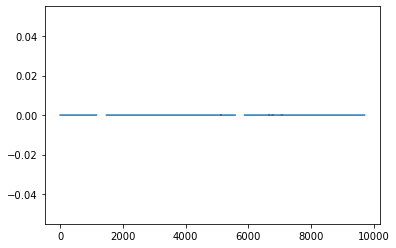

In [7]:
df.AMU1.plot()

In [8]:
# Yields MemoryError: Unable to allocate 319. TiB for an array with shape (43812872618454,) and data type float64
#profile = ProfileReport(df, title='COSO fluid inclusions profiling')
#profile

We can't load the file into pandas profiling as it's too large but the values need to be floats, we could perhaps change them to float32 to save some space but that probably won't be enough.

From [this](https://www.zdnet.com/article/how-much-does-1-5tb-of-ram-cost/) webpage, 1TB of RAM costs USD12,000 so for 319 TB the base cost would be USD3,828,000

In [9]:
amu_map = {'AMU16':'CH4', 'AMU28':'N2', 'AMU39':'propene', 'AMU40':'Ar', 'AMU43':'propane', 'AMU44':'CO2'} 
# df['CH4'] = df['AMU16']
# df['N2'] = df['AMU28']
# df['propene'] = df['AMU39']
# df['Ar'] = df['AMU40']
# df['propane'] = df['AMU43']
# df['CO2'] = df['AMU44']

df = df.rename(mapper=amu_map, axis=1) 
df['N2/Ar'] = df['N2']/df['Ar'] 
df['CO2/CH4'] = df['CO2']/df['CH4'] 
df['CO2/N2'] = df['CO2']/df['N2'] 
df['R1'] = df['N2/Ar'] + df['CO2/CH4'] 
df['R2'] = df['N2/Ar'] + df['CO2/N2'] 
df['dCO2/N2'] = df['CO2/N2'].diff() 
df['shallow_fluids1'] = df['N2/Ar'] < 200 
df['shallow_fluids2'] = df['CO2/CH4'] < 4 
df['shallow_fluids3'] = df['propane']/df['propene'] > 1 
df['shallow_fluids4'] = 1/df['R1'] > 0.5 
df = df.replace([np.inf, -np.inf], 0)

In [10]:
df.head()

,Type,Geothermal Province,State,Field,Well ID,Sample ID,Depth (ft),AMU1,AMU2,AMU3,AMU4,AMU5,AMU6,AMU7,AMU8,AMU9,AMU10,AMU11,AMU12,AMU13,AMU14,AMU15,CH4,AMU17,AMU18,AMU19,AMU20,AMU21,AMU22,AMU23,AMU24,AMU25,AMU26,AMU27,N2,AMU29,AMU30,AMU31,AMU32,AMU33,AMU34,AMU35,AMU36,AMU37,AMU38,propene,Ar,AMU41,AMU42,propane,CO2,AMU45,AMU46,AMU47,AMU48,AMU49,AMU50,AMU51,AMU52,AMU53,AMU54,AMU55,AMU56,AMU57,AMU58,AMU59,AMU60,AMU61,AMU62,AMU63,AMU64,AMU65,AMU66,AMU67,AMU68,AMU69,AMU70,AMU71,AMU72,AMU73,AMU74,AMU75,AMU76,AMU77,AMU78,AMU79,AMU80,AMU81,AMU82,AMU83,AMU84,AMU85,AMU86,AMU87,AMU88,AMU89,AMU90,AMU91,AMU92,AMU93,AMU94,AMU95,AMU96,AMU97,AMU98,AMU99,AMU100.UNKN,AMU101.UNKN,AMU102.UNKN,AMU103.UNKN,AMU104.UNKN,AMU105.UNKN,AMU106.UNKN,AMU107.UNKN,AMU108.UNKN,AMU109.UNKN,AMU110.UNKN,AMU111.UNKN,AMU112.UNKN,AMU113.UNKN,AMU114.UNKN,AMU115.UNKN,AMU116.UNKN,AMU117.UNKN,AMU118.UNKN,AMU119.UNKN,AMU120.UNKN,AMU121.UNKN,AMU122.UNKN,AMU123.UNKN,AMU124.UNKN,AMU125.UNKN,AMU126.UNKN,AMU127.UNKN,AMU128.UNKN,AMU129.UNKN,AMU130.UNKN,AMU131.UNKN,AMU132.UNKN,AMU133.UNKN,AMU134.UNKN,AMU135.UNKN,AMU136.UNKN,AMU137.UNKN,AMU138.UNKN,AMU139.UNKN,AMU140.UNKN,AMU141.UNKN,AMU142.UNKN,AMU143.UNKN,AMU144.UNKN,AMU145.UNKN,AMU146.UNKN,AMU147.UNKN,AMU148.UNKN,AMU149.UNKN,AMU150.UNKN,AMU151.UNKN,AMU152.UNKN,AMU153.UNKN,AMU154.UNKN,AMU155.UNKN,AMU156.UNKN,AMU157.UNKN,AMU158.UNKN,AMU159.UNKN,AMU160.UNKN,AMU161.UNKN,AMU162.UNKN,AMU163.UNKN,AMU164.UNKN,AMU165.UNKN,AMU166.UNKN,AMU167.UNKN,AMU168.UNKN,AMU169.UNKN,AMU170.UNKN,AMU171.UNKN,AMU172.UNKN,AMU173.UNKN,AMU174.UNKN,AMU175.UNKN,AMU176.UNKN,AMU177.UNKN,AMU178.UNKN,AMU179.UNKN,AMU180.UNKN,FIT Well,Unnamed: 188,Unnamed: 8,Unnamed: 9,Unnamed: 187,N2/Ar,CO2/CH4,CO2/N2,R1,R2,dCO2/N2,shallow_fluids1,shallow_fluids2,shallow_fluids3,shallow_fluids4
0,Transform Extension,Sierra Nevada,California,COSO,15A-17,2202.0,510.0,0.0,294200.0,53.30,6.455000e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88430.0,5079.0,66790.0,30300.0,378600.0,98680.0,224600.0,0.0,0.0,282.9,11060.0,1.479000e+02,155.90,754.4,8497.0,206200.0,1530000.0,15190.0,2737.0,570.1,8456.00,1126.0,8829.0,288.7,0.00,195.5,1045.0,5693.0,6084.0,18260.0,7317.0,51020.0,1380000.0,56790.0,5054.0,0.0,0.0,0.000000e+00,421.10,192.80,6.827000e-11,3.927000e-11,2.681000e+02,1254.0,2515.0,3044.0,624.8,1.522000e-10,270.000,0.000,70.64,367.1,415.6,154.60,0.00,238.50,283.8,593.2,649.5,795.0,239.00,11.71,79.37,218.60,224.30,32.86,603.8,58.46,156.10,0.00,47.97,155.30,93.72,266.4,78.49,1.402,15.04,169.6,0.0,0.0,0.0,323.30,0.00,1.691,16.87,221.50,25.34,21.940,35.880,0.00,0.0,0.0,0.0,0.0,0.0,596.9,0.0,0.00,29.200,33.94,38.620,27.35,7.475,0.00,0.0000,6.527,1607.00,2109.0,31.710,0.00,31.41,37.170,28.190,0.000,5.205,14.820,0.00,0.0,1022.0,0.0,106.0,102.7,21.21,79.68,130.100,0.00,30.26,0.00,2.570,258.5,210.8,0.0,0.000,472.1,0.0,0.00,0.00,285.30,67.74,0.00,0.00,0.00,69.27,0.0,7009.0,29.7300,NaN,0.00,0.0,442.7,0.00,145.70,0.000,0.0,1055.0,0.0,0.000,10960000.0,0.0,41.940,0.0,0.000,0.00,0.00,0.0,0.00,2434.00,0.0,0.000,NaN,NaN,NaN,NaN,NaN,251.479290,3.645008,0.901961,255.124298,252.381251,NaN,False,True,True,False
1,Transform Extension,Sierra Nevada,California,COSO,15A-17,2203.0,530.0,0.0,320600.0,48.95,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139200.0,3151.0,38760.0,62420.0,4367000.0,236000.0,511900.0,0.0,0.0,252.4,13800.0,9.894000e-12,95.07,535.4,5247.0,171900.0,945500.0,10890.0,2670.0,1079.0,13810.00,0.0,7551.0,0.0,0.00,203.8,351.7,1784.0,2762.0,14840.0,3233.0,92310.0,2615000.0,76580.0,6120.0,0.0,0.0,1.911000e+02,395.30,361.90,0.000000e+00,3.957000e+01,3.416000e-11,1699.0,1016.0,2696.0,163.0,1.524000e-10,153.700,27.460,16.07,1693.0,324.6,15.44,18.17,96.81,70.5,381.1,342.0,334.1,95.34,21.39,0.00,40.75,91.02,85.20,373.4,101.40,0.00,0.00,0.00,75.64,75.92,200.3,44.11,3.224,1125.00,0.0,0.0,451.4,583.2,0.00,33.30,0.000,79.69,17.98,19.65,83.230,8.254,0.00,307.1,0.0,0.0,0.0,0.0,51.1,0.0,0.00,77.890,18.34,0.000,43.72,11.200,32.39,0.1626,0.000,169.80,1927.0,0.000,20.53,33.24,7.305,2.915,19.460,27.590,18.990,17.27,61.2,0.0,17

We did some iniital EDA by creating heatmaps and looking at individual wells. We noticed that there are interesting breaks when signals are particularly noisy or strong versus almost no signals.

In [11]:
dfselected = df[df['Well ID'] == '15A-17']

In [12]:
dfselected

,Type,Geothermal Province,State,Field,Well ID,Sample ID,Depth (ft),AMU1,AMU2,AMU3,AMU4,AMU5,AMU6,AMU7,AMU8,AMU9,AMU10,AMU11,AMU12,AMU13,AMU14,AMU15,CH4,AMU17,AMU18,AMU19,AMU20,AMU21,AMU22,AMU23,AMU24,AMU25,AMU26,AMU27,N2,AMU29,AMU30,AMU31,AMU32,AMU33,AMU34,AMU35,AMU36,AMU37,AMU38,propene,Ar,AMU41,AMU42,propane,CO2,AMU45,AMU46,AMU47,AMU48,AMU49,AMU50,AMU51,AMU52,AMU53,AMU54,AMU55,AMU56,AMU57,AMU58,AMU59,AMU60,AMU61,AMU62,AMU63,AMU64,AMU65,AMU66,AMU67,AMU68,AMU69,AMU70,AMU71,AMU72,AMU73,AMU74,AMU75,AMU76,AMU77,AMU78,AMU79,AMU80,AMU81,AMU82,AMU83,AMU84,AMU85,AMU86,AMU87,AMU88,AMU89,AMU90,AMU91,AMU92,AMU93,AMU94,AMU95,AMU96,AMU97,AMU98,AMU99,AMU100.UNKN,AMU101.UNKN,AMU102.UNKN,AMU103.UNKN,AMU104.UNKN,AMU105.UNKN,AMU106.UNKN,AMU107.UNKN,AMU108.UNKN,AMU109.UNKN,AMU110.UNKN,AMU111.UNKN,AMU112.UNKN,AMU113.UNKN,AMU114.UNKN,AMU115.UNKN,AMU116.UNKN,AMU117.UNKN,AMU118.UNKN,AMU119.UNKN,AMU120.UNKN,AMU121.UNKN,AMU122.UNKN,AMU123.UNKN,AMU124.UNKN,AMU125.UNKN,AMU126.UNKN,AMU127.UNKN,AMU128.UNKN,AMU129.UNKN,AMU130.UNKN,AMU131.UNKN,AMU132.UNKN,AMU133.UNKN,AMU134.UNKN,AMU135.UNKN,AMU136.UNKN,AMU137.UNKN,AMU138.UNKN,AMU139.UNKN,AMU140.UNKN,AMU141.UNKN,AMU142.UNKN,AMU143.UNKN,AMU144.UNKN,AMU145.UNKN,AMU146.UNKN,AMU147.UNKN,AMU148.UNKN,AMU149.UNKN,AMU150.UNKN,AMU151.UNKN,AMU152.UNKN,AMU153.UNKN,AMU154.UNKN,AMU155.UNKN,AMU156.UNKN,AMU157.UNKN,AMU158.UNKN,AMU159.UNKN,AMU160.UNKN,AMU161.UNKN,AMU162.UNKN,AMU163.UNKN,AMU164.UNKN,AMU165.UNKN,AMU166.UNKN,AMU167.UNKN,AMU168.UNKN,AMU169.UNKN,AMU170.UNKN,AMU171.UNKN,AMU172.UNKN,AMU173.UNKN,AMU174.UNKN,AMU175.UNKN,AMU176.UNKN,AMU177.UNKN,AMU178.UNKN,AMU179.UNKN,AMU180.UNKN,FIT Well,Unnamed: 188,Unnamed: 8,Unnamed: 9,Unnamed: 187,N2/Ar,CO2/CH4,CO2/N2,R1,R2,dCO2/N2,shallow_fluids1,shallow_fluids2,shallow_fluids3,shallow_fluids4
0,Transform Extension,Sierra Nevada,California,COSO,15A-17,2202.0,510.0,0.0,294200.0,53.30,6.455000e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88430.0,5079.0,66790.0,30300.0,378600.0,98680.0,224600.0,0.0,0.0,282.90,11060.0,1.479000e+02,155.90,754.4,8497.0,206200.0,1530000.0,15190.0,2737.0,570.1,8456.00,1126.0,8829.0,288.7,0.00,195.5,1045.0,5693.0,6084.0,18260.0,7317.0,51020.0,1380000.0,56790.0,5054.0,0.000000e+00,0.00,0.000000e+00,421.10,192.80,6.827000e-11,3.927000e-11,2.681000e+02,1254.0,2515.0,3044.0,624.8,1.522000e-10,270.000,0.000,70.64,367.10,415.6,154.60,0.00,238.50,283.8,593.20,649.5,795.0,239.00,11.71,79.37,218.60,224.30,32.86,603.8,58.46,156.10,0.00,47.97,155.300,93.72,266.400,78.49,1.402,15.04,169.6,0.0,0.0,0.0,323.30,0.00,1.6910,16.87,221.50,25.34,21.940,35.880,0.00,0.0,0.00,0.0,0.0,0.00,596.90,0.0,0.00,29.200,33.94,38.620,27.35,7.475,0.000,0.0000,6.527,1607.00,2109.00,31.710,0.0000,31.410,37.170,28.190,0.000,5.205,14.820,0.0000,0.000,1022.00,0.0000,106.000,102.700,21.21000,79.6800,130.100,0.000,30.2600,0.000,2.570,258.5000,210.800,0.000,0.000,472.1000,0.0000,0.0000,0.0000,285.3000,67.7400,0.000,0.00000,0.000,6.927000e+01,0.00,7009.0000,29.7300,NaN,0.0000,0.0000,442.7000,0.000000e+00,145.700,0.0000,0.000,1055.00000,0.000,0.000,1.096000e+07,0.0,4.194000e+01,0.0,0.0000,0.0000,0.000000e+00,0.0000,0.000000e+00,2.434000e+03,0.000000e+00,0.000,NaN,NaN,NaN,NaN,NaN,251.479290,3.645008,0.901961,255.124298,252.381251,NaN,False,True,True,False
1,Transform Extension,Sierra Nevada,California,COSO,15A-17,2203.0,530.0,0.0,320600.0,48.95,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139200.0,3151.0,38760.0,62420.0,4367000.0,236000.0,511900.0,0.0,0.0,252.40,13800.0,9.894000e-12,95.07,535.4,5247.0,171900.0,945500.0,10890.0,2670.0,1079.0,13810.00,0.0,7551.0,0.0,0.00,203.8,351.7,1784.0,2762.0,14840.0,3233.0,92310.0,2615000.0,76580.0,6120.0,0.000000e+00,0.00,1.911000e+02,395.30,361.90,0.000000e+00,3.957000e+01,3.416000e-11,1699.0,1016.0,2696.0,163.0,1.524000e-10,153.700,27.460,16.07,1693.00,324.6,15.44,18.17,96.81,70.5,381.10,342.0,334.1,95.34,21.39,0.00,40.75,91.02,85.20,373.4,101.40,0.00,0.00,0.00,75.640,75.92,200.300,44.11,3.224,1125.00,0.0,0.0,451.4,583.2,0.00,33.30,0.0000,79.69,17.98,19.65,83.230,8.254,0.00

In [13]:
amu_list = df.columns

In [14]:
amu_list1 = amu_list[7:-15].tolist()

In [15]:
amu_list2 = amu_list[-10:-5].tolist()

In [16]:
amu_list_update = amu_list1 + amu_list2

In [17]:
amu = dfselected[amu_list_update]
amu_fluids = dfselected[amu_list2]

In [18]:
amu

,AMU1,AMU2,AMU3,AMU4,AMU5,AMU6,AMU7,AMU8,AMU9,AMU10,AMU11,AMU12,AMU13,AMU14,AMU15,CH4,AMU17,AMU18,AMU19,AMU20,AMU21,AMU22,AMU23,AMU24,AMU25,AMU26,AMU27,N2,AMU29,AMU30,AMU31,AMU32,AMU33,AMU34,AMU35,AMU36,AMU37,AMU38,propene,Ar,AMU41,AMU42,propane,CO2,AMU45,AMU46,AMU47,AMU48,AMU49,AMU50,AMU51,AMU52,AMU53,AMU54,AMU55,AMU56,AMU57,AMU58,AMU59,AMU60,AMU61,AMU62,AMU63,AMU64,AMU65,AMU66,AMU67,AMU68,AMU69,AMU70,AMU71,AMU72,AMU73,AMU74,AMU75,AMU76,AMU77,AMU78,AMU79,AMU80,AMU81,AMU82,AMU83,AMU84,AMU85,AMU86,AMU87,AMU88,AMU89,AMU90,AMU91,AMU92,AMU93,AMU94,AMU95,AMU96,AMU97,AMU98,AMU99,AMU100.UNKN,AMU101.UNKN,AMU102.UNKN,AMU103.UNKN,AMU104.UNKN,AMU105.UNKN,AMU106.UNKN,AMU107.UNKN,AMU108.UNKN,AMU109.UNKN,AMU110.UNKN,AMU111.UNKN,AMU112.UNKN,AMU113.UNKN,AMU114.UNKN,AMU115.UNKN,AMU116.UNKN,AMU117.UNKN,AMU118.UNKN,AMU119.UNKN,AMU120.UNKN,AMU121.UNKN,AMU122.UNKN,AMU123.UNKN,AMU124.UNKN,AMU125.UNKN,AMU126.UNKN,AMU127.UNKN,AMU128.UNKN,AMU129.UNKN,AMU130.UNKN,AMU131.UNKN,AMU132.UNKN,AMU133.UNKN,AMU134.UNKN,AMU135.UNKN,AMU136.UNKN,AMU137.UNKN,AMU138.UNKN,AMU139.UNKN,AMU140.UNKN,AMU141.UNKN,AMU142.UNKN,AMU143.UNKN,AMU144.UNKN,AMU145.UNKN,AMU146.UNKN,AMU147.UNKN,AMU148.UNKN,AMU149.UNKN,AMU150.UNKN,AMU151.UNKN,AMU152.UNKN,AMU153.UNKN,AMU154.UNKN,AMU155.UNKN,AMU156.UNKN,AMU157.UNKN,AMU158.UNKN,AMU159.UNKN,AMU160.UNKN,AMU161.UNKN,AMU162.UNKN,AMU163.UNKN,AMU164.UNKN,AMU165.UNKN,AMU166.UNKN,AMU167.UNKN,AMU168.UNKN,AMU169.UNKN,AMU170.UNKN,AMU171.UNKN,AMU172.UNKN,AMU173.UNKN,AMU174.UNKN,AMU175.UNKN,AMU176.UNKN,AMU177.UNKN,AMU178.UNKN,AMU179.UNKN,AMU180.UNKN,N2/Ar,CO2/CH4,CO2/N2,R1,R2
0,0.0,294200.0,53.30,6.455000e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88430.0,5079.0,66790.0,30300.0,378600.0,98680.0,224600.0,0.0,0.0,282.90,11060.0,1.479000e+02,155.90,754.4,8497.0,206200.0,1530000.0,15190.0,2737.0,570.1,8456.00,1126.0,8829.0,288.7,0.00,195.5,1045.0,5693.0,6084.0,18260.0,7317.0,51020.0,1380000.0,56790.0,5054.0,0.000000e+00,0.00,0.000000e+00,421.10,192.80,6.827000e-11,3.927000e-11,2.681000e+02,1254.0,2515.0,3044.0,624.8,1.522000e-10,270.000,0.000,70.64,367.10,415.6,154.60,0.00,238.50,283.8,593.20,649.5,795.0,239.00,11.71,79.37,218.60,224.30,32.86,603.8,58.46,156.10,0.00,47.97,155.300,93.72,266.400,78.49,1.402,15.04,169.6,0.0,0.0,0.0,323.30,0.00,1.6910,16.87,221.50,25.34,21.940,35.880,0.00,0.0,0.00,0.0,0.0,0.00,596.90,0.0,0.00,29.200,33.94,38.620,27.35,7.475,0.000,0.0000,6.527,1607.00,2109.00,31.710,0.0000,31.410,37.170,28.190,0.000,5.205,14.820,0.0000,0.000,1022.00,0.0000,106.000,102.700,21.21000,79.6800,130.100,0.000,30.2600,0.000,2.570,258.5000,210.800,0.000,0.000,472.1000,0.0000,0.0000,0.0000,285.3000,67.7400,0.000,0.00000,0.000,6.927000e+01,0.00,7009.0000,29.7300,NaN,0.0000,0.0000,442.7000,0.000000e+00,145.700,0.0000,0.000,1055.00000,0.000,0.000,1.096000e+07,0.0,4.194000e+01,0.0,0.0000,0.0000,0.000000e+00,0.0000,0.000000e+00,2.434000e+03,0.000000e+00,0.000,251.479290,3.645008,0.901961,255.124298,252.381251
1,0.0,320600.0,48.95,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139200.0,3151.0,38760.0,62420.0,4367000.0,236000.0,511900.0,0.0,0.0,252.40,13800.0,9.894000e-12,95.07,535.4,5247.0,171900.0,945500.0,10890.0,2670.0,1079.0,13810.00,0.0,7551.0,0.0,0.00,203.8,351.7,1784.0,2762.0,14840.0,3233.0,92310.0,2615000.0,76580.0,6120.0,0.000000e+00,0.00,1.911000e+02,395.30,361.90,0.000000e+00,3.957000e+01,3.416000e-11,1699.0,1016.0,2696.0,163.0,1.524000e-10,153.700,27.460,16.07,1693.00,324.6,15.44,18.17,96.81,70.5,381.10,342.0,334.1,95.34,21.39,0.00,40.75,91.02,85.20,373.4,101.40,0.00,0.00,0.00,75.640,75.92,200.300,44.11,3.224,1125.00,0.0,0.0,451.4,583.2,0.00,33.30,0.0000,79.69,17.98,19.65,83.230,8.254,0.00,307.1,0.00,0.0,0.0,0.00,51.10,0.0,0.00,77.890,18.34,0.000,43.72,11.200,32.390,0.1626,0.000,169.80,1927.00,0.000,20.5300,33.240,7.305,2.915,19.460,27.590,18.990,17.2700,61.200,0.00,1776.0000,278.700,145.300,123.90000,97.8000,7.901,77.500,0.0000,0.000,0.000,0.0000,0.000,684.400,0.000,561.1000,122.9000,28.0200,15.4700,0.0000,0.0000,0.000,129.60000,0.000,0.000000e+00,0.00,7181.0000

In [19]:
amu_fluids

,N2/Ar,CO2/CH4,CO2/N2,R1,R2
0,251.479290,3.645008,0.901961,255.124298,252.381251
1,342.324403,0.598809,2.765732,342.923212,345.090135
2,206.087328,0.000000,2.536922,0.000000,208.624250
3,0.000000,0.000000,2.924638,0.000000,0.000000
4,331.040670,30.660377,1.350497,361.701047,332.391167
...,...,...,...,...,...
334,211.075949,2.997712,0.314243,214.073661,211.390192
335,228.602384,3.603067,0.630964,232.205451,229.233347
336,236.177474,3.550347,0.629263,239.727821,236.806737
337,157.389635,3.440466,0.972561,160.830101,158.362196


In [20]:
amu.values

array([[0.00000000e+00, 2.94200000e+05, 5.33000000e+01, ...,
        9.01960784e-01, 2.55124298e+02, 2.52381251e+02],
       [0.00000000e+00, 3.20600000e+05, 4.89500000e+01, ...,
        2.76573242e+00, 3.42923212e+02, 3.45090135e+02],
       [0.00000000e+00, 3.85400000e+05, 1.59400000e+02, ...,
        2.53692202e+00, 0.00000000e+00, 2.08624250e+02],
       ...,
       [0.00000000e+00, 3.30800000e+05, 2.59700000e+01, ...,
        6.29263006e-01, 2.39727821e+02, 2.36806737e+02],
       [0.00000000e+00, 5.05700000e+05, 7.12800000e+01, ...,
        9.72560976e-01, 1.60830101e+02, 1.58362196e+02],
       [0.00000000e+00, 4.44100000e+05, 7.08400000e+01, ...,
        1.45949926e+00, 1.44762737e+02, 1.40243352e+02]])

In [21]:
amuarr = amu.values
amuarr_fluids = amu_fluids.values

In [22]:
x = np.nan_to_num(amuarr)
x_fluids = np.nan_to_num(amuarr_fluids)

In [23]:
def norm(s):
    if np.std(s) == 0:
        return s
    else:
        return s/np.std(s)

In [24]:
ma = np.percentile(amuarr, 95)
ma_fluids = np.percentile(amuarr_fluids, 95)

In [25]:
x2 = np.apply_along_axis(norm, axis=0, arr = x)
x2_fluids = np.apply_along_axis(norm, axis=0, arr = x_fluids)

In [26]:
x2_fluids

array([[0.09704177, 0.07593782, 0.61398582, 0.81186126, 0.09739171],
       [0.13209742, 0.01247522, 1.88269881, 1.09125659, 0.13316726],
       [0.07952575, 0.        , 1.72694222, 0.        , 0.08050627],
       ...,
       [0.09113705, 0.07396571, 0.42835406, 0.76286631, 0.09138165],
       [0.0607341 , 0.07167652, 0.66204503, 0.51179652, 0.06111058],
       [0.05355443, 0.12456034, 0.99351532, 0.46066666, 0.05411868]])

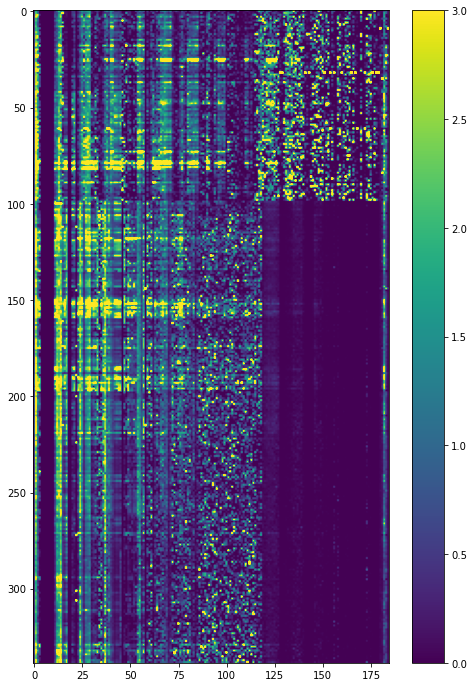

In [27]:
plt.figure(figsize=(8,12))
plt.imshow(x2, vmax=3, vmin=0)
plt.colorbar()

We got some help with making this slider so that we can examine the mass spectrometer's readings via each depth level to see what the signals looked like.

In [28]:
@interact(depth = (0,x2.shape[0],1))
def show_spec(depth):
    fig, axs = plt.subplots(ncols = 2, figsize=(16,8))
    im = axs[0].imshow(x2, vmax=3, vmin=0)
    fig.colorbar(im)
    axs[0].axhline(depth, c='r')
    axs[1].plot(x2[depth,:])
    axs[1].set_ylim(0.1,3)
    #axs[1].set_yscale('log')

interactive(children=(IntSlider(value=169, description='depth', max=339), Output()), _dom_classes=('widget-int…

## `missingno`

<AxesSubplot:>

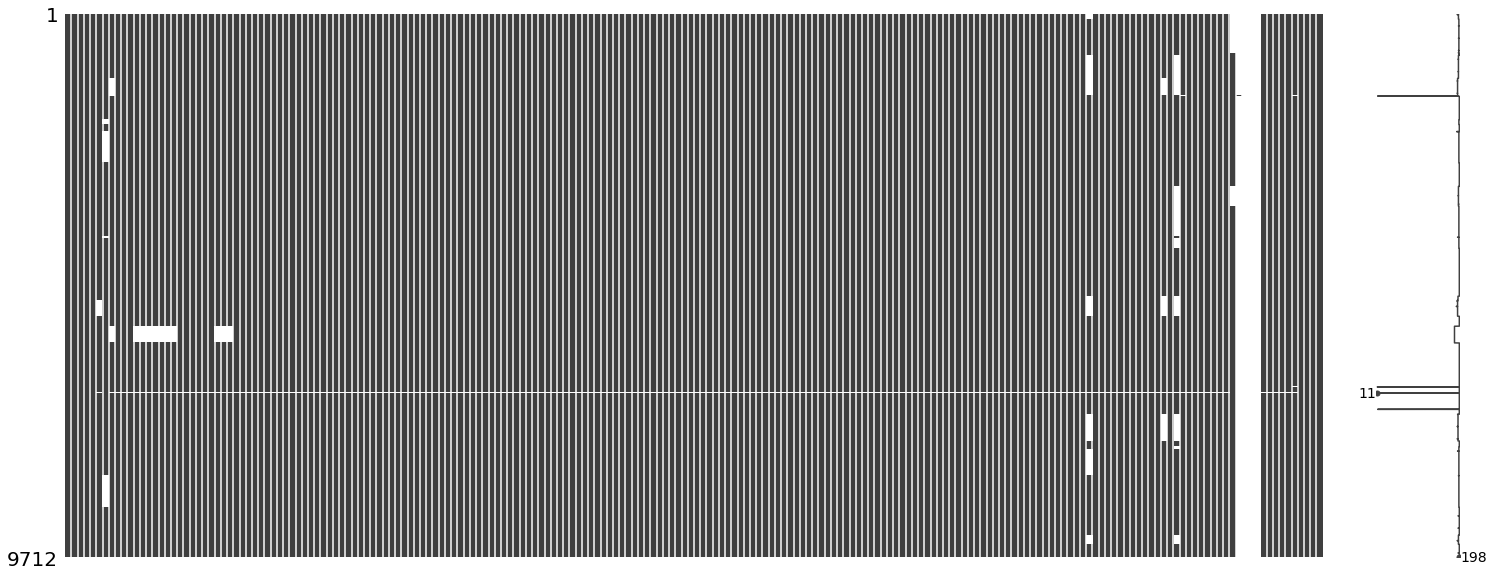

In [29]:
msno.matrix(df)

## Fluid Inclusion Graphs

Next we tried to duplicate the figures from Figure 11, page 21 from the paper titled "IDENTIFYING FRACTURE TYPES AND RELATIVE AGES USING FLUID INCLUSION
STRATIGRAPHY"

https://www.osti.gov/servlets/purl/933170


In [30]:
well_data = df[df['Well ID'] == "88-20"]

In [31]:
# #N2 = AMU28
# Ar = AMU40
# CO2 = AMU44
# CH4 = AMU16
# propane = AMU43
# propene = AMU39

In [32]:
welldata_map = ['Depth (ft)','CH4', 'N2', 'propene', 'Ar', 'propane', 'CO2']

well_data1 = well_data[welldata_map]
well_data1 = well_data1.rename(columns={'Depth (ft)': 'DEPTH'})

We selected the AMU numbers of interest based on the overview from the git.

In [33]:
well_data1

,DEPTH,CH4,N2,propene,Ar,propane,CO2
9316,490.0,0.0,719500.0,1915.0,2613.0,36610.0,1114000.0
9317,510.0,0.0,818800.0,4171.0,6588.0,32350.0,633400.0
9318,530.0,0.0,1878000.0,5513.0,7355.0,15330.0,698500.0
9319,550.0,189200.0,1659000.0,3683.0,8538.0,46140.0,1841000.0
9320,570.0,308300.0,889300.0,11040.0,5935.0,65300.0,1375000.0
...,...,...,...,...,...,...,...
9707,8070.0,469300.0,4197000.0,6881.0,8900.0,313900.0,3573000.0
9708,8090.0,437000.0,3765000.0,5152.0,9948.0,304600.0,3195000.0
9709,8110.0,971900.0,5340000.0,10290.0,10790.0,424800.0,4062000.0
9710,8130.0,0.0,4541000.0,7102.0,11590.0,323600.0,3823000.0


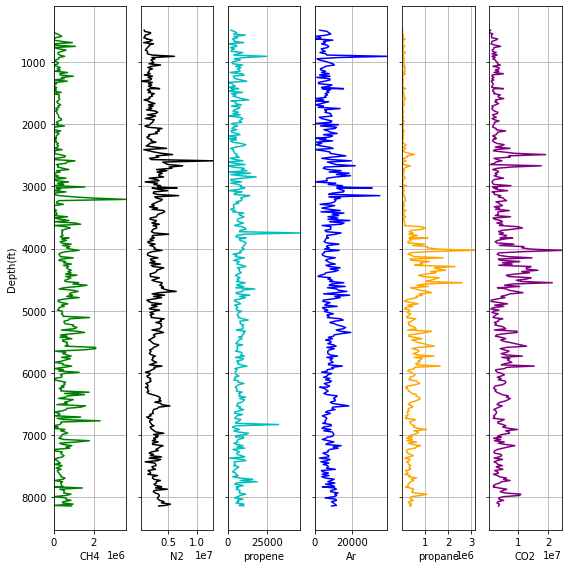

In [34]:
amu_map = {'AMU16':'CH4', 'AMU28':'N2', 'AMU39':'propene', 'AMU40':'Ar', 'AMU43':'propane', 'AMU44':'CO2'} 

f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 8), sharey=True)

ax[0].plot(well_data1.CH4, well_data1.DEPTH, color='green')
ax[1].plot(well_data1.N2, well_data1.DEPTH, color='black')
ax[2].plot(well_data1.propene, well_data1.DEPTH, color='c')
ax[3].plot(well_data1.Ar, well_data1.DEPTH, color='blue')
ax[4].plot(well_data1.propane, well_data1.DEPTH, color='orange')
ax[5].plot(well_data1.CO2, well_data1.DEPTH, color='purple')
for i in range(len(ax)):
#     ax[i].set_ylim(well_data1.DEPTH[0], well_data1.DEPTH[-1])

    ax[i].grid()

ax[0].invert_yaxis()
ax[0].set_xlabel("CH4")
ax[0].set_xlim(well_data1.CH4.min(), well_data1.CH4.max())
ax[0].set_ylabel("Depth(ft)")
ax[1].set_xlabel("N2")
ax[1].set_xlim(well_data1.N2.min(), well_data1.N2.max())
ax[2].set_xlabel("propene")
ax[2].set_xlim(well_data1.propene.min(), well_data1.propene.max())
ax[3].set_xlabel("Ar")
ax[3].set_xlim(well_data1.Ar.min(), well_data1.Ar.max())
ax[4].set_xlabel("propane")
ax[4].set_xlim(well_data1.propane.min(), well_data1.propane.max())
ax[5].set_xlabel("CO2")
ax[5].set_xlim(well_data1.CO2.min(), well_data1.CO2.max())
plt.tight_layout()